In [3]:
!curl https://data.cityofnewyork.us/api/views/ia2d-e54m/rows.csv?accessType=DOWNLOAD > nycwater.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1006    0  1006    0     0   5227      0 --:--:-- --:--:-- --:--:--  5212


In [4]:
import os
print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/mb6203/PUIdata


In [5]:
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/mb6203/PUI2018/PUIdata


In [6]:
!mv nycwater.csv $PUIDATA

In [7]:
!ls $PUIDATA

nycenergy.csv  nycomb.csv  nycwater.csv  populationnyc.csv


In [77]:
import pandas as pd
nycwater = pd.read_csv("%s/nycwater.csv"%os.getenv("PUIDATA"))
import matplotlib.pyplot as plt


In [78]:
nycwater.head(8)

,Year,New York City Population,NYC Consumption(Million gallons per day),Per Capita(Gallons per person per day)
0,1979,7102100.0,1512.0,213
1,1980,7071639.0,1506.0,213
2,1981,7089241.0,1309.0,185
3,1982,7109105.0,1382.0,194
4,1983,7181224.0,1424.0,198
5,1984,7234514.0,1465.0,203
6,1985,7274054.0,1326.0,182
7,1986,7319246.0,1351.0,185


In [79]:
nycwater.columns

Index(['Year', 'New York City Population',
       'NYC Consumption(Million gallons per day)',
       'Per Capita(Gallons per person per day)'],
      dtype='object')

In [80]:
nycwater.size

156

In [155]:
nycwater_2c = nycwater[['New York City Population', 'NYC Consumption(Million gallons per day)']]

In [156]:
nycwater_2c.head(7)

,New York City Population,NYC Consumption(Million gallons per day)
0,7102100.0,1512.0
1,7071639.0,1506.0
2,7089241.0,1309.0
3,7109105.0,1382.0
4,7181224.0,1424.0
5,7234514.0,1465.0
6,7274054.0,1326.0


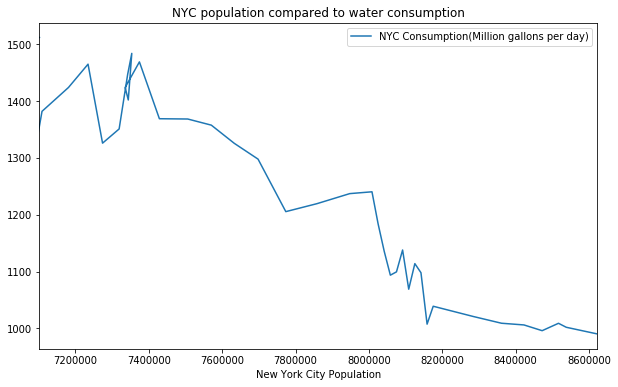

In [222]:
nycwater_2c.plot(x="New York City Population", y="NYC Consumption(Million gallons per day)")
plt.title('NYC population compared to water consumption')
plt.rcParams["figure.figsize"] = (10,6)



In [184]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


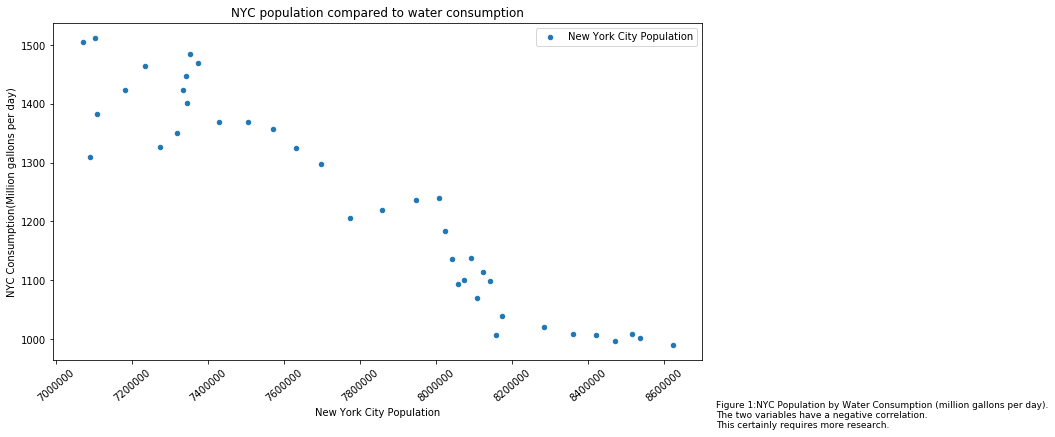

In [244]:
nycwater_2c.plot(x="New York City Population", y="NYC Consumption(Million gallons per day)", kind='scatter', rot=40);
plt.title('NYC population compared to water consumption')
plt.legend(nycwater_2c)
txt="Figure 1:NYC Population by Water Consumption (million gallons per day).\nThe two variables have a negative correlation.\nThis certainly requires more research." 
plt.figtext(1, 0.0001, txt, wrap=True, horizontalalignment='left',fontsize=9)
plt.rcParams["figure.figsize"] = (10,6)

plt.tight_layout()
savefig('IMG1.pdf')


In [196]:
url = "https://data.cityofnewyork.us/resource/waf7-5gvc.json"

In [164]:
df = pd.read_json(url)

In [165]:
df.head(7)

,new_york_city_population,nyc_consumption_million_gallons_per_day,per_capita_gallons_per_person_per_day,year
0,7102100.0,1512.0,213,1979
1,7071639.0,1506.0,213,1980
2,7089241.0,1309.0,185,1981
3,7109105.0,1382.0,194,1982
4,7181224.0,1424.0,198,1983
5,7234514.0,1465.0,203,1984
6,7274054.0,1326.0,182,1985


In [166]:
nycwater_3c = df[['year', 'new_york_city_population', 'nyc_consumption_million_gallons_per_day']]

In [167]:
nycwater_3c.rename(columns = {'year':'Year', 
               'new_york_city_population':'new york city population', 
               'nyc_consumption_million_gallons_per_day': 'nyc consumption million gallons per day'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


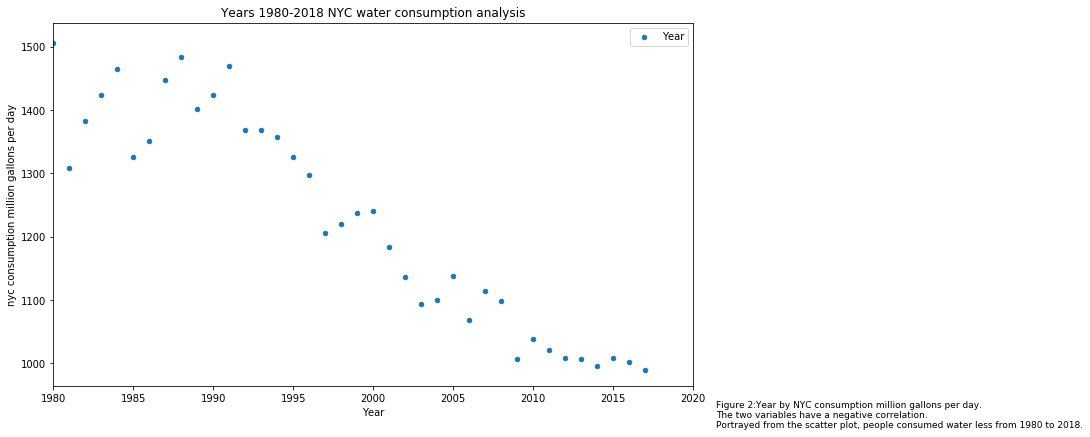

In [245]:
ax = nycwater_3c.plot(x='Year', y='nyc consumption million gallons per day', kind='scatter');
ax.set_ylabel("nyc consumption million gallons per day"); ax.set_xlim(1980, 2020)
plt.title('Years 1980-2018 NYC water consumption analysis')
plt.legend(nycwater_3c)
txt="Figure 2:Year by NYC consumption million gallons per day.\nThe two variables have a negative correlation.\nPortrayed from the scatter plot, people consumed water less from 1980 to 2018." 
plt.figtext(1, 0.0001, txt, wrap=True, horizontalalignment='left',fontsize=9)
plt.rcParams["figure.figsize"] = (10,6)
plt.tight_layout()
savefig('IMG2.pdf')